In [2]:
import pandas as pd
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 10)})

In [3]:
PATH = "../dados/brutos/HIST_PAINEL_COVIDBR_20mai2020.xlsx"

In [4]:
data_df = pd.read_excel(PATH)

In [5]:
data_df["data"] = pd.to_datetime(data_df["data"])
data_df.sort_values(by="data", inplace=True)

In [6]:
data_df.tail()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,obitosAcumulado,Recuperadosnovos,emAcompanhamentoNovos
14640,Nordeste,MA,Sítio Novo,21,211180.0,21008.0,Imperatriz,2020-05-20,21,18081.0,27,0,NaN,NaN
39826,Nordeste,BA,Irará,29,291450.0,29006.0,Feira de Santana,2020-05-20,21,29034.0,2,0,NaN,NaN
72396,Sul,PR,Arapongas,41,410150.0,41016.0,16ª RS Apucarana,2020-05-20,21,123027.0,19,1,NaN,NaN
72308,Sul,PR,Andirá,41,410110.0,41018.0,18ª RS Cornélio Procópio,2020-05-20,21,20031.0,3,0,NaN,NaN
95915,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,Brasília,2020-05-20,21,3015268.0,5161,77,NaN,NaN


# Análise do Brasil

In [7]:
brasil_df = data_df[data_df["regiao"] == "Brasil"]

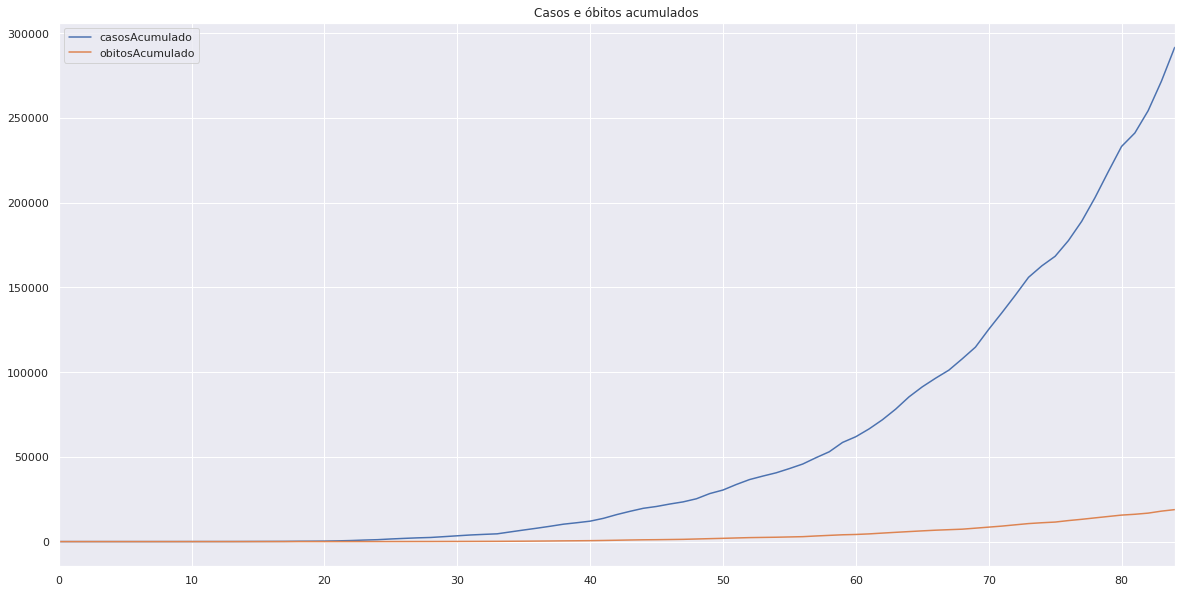

In [8]:
brasil_df[["casosAcumulado", "obitosAcumulado"]].plot(title="Casos e óbitos acumulados")

# Análise de estados

In [9]:
aux_df = data_df[data_df["regiao"] != "Brasil"]
aux_df = aux_df[["regiao", "estado", "data", "municipio", "casosAcumulado", "obitosAcumulado"]]

In [10]:
aux_df = aux_df.groupby(["data", "estado"]).sum()
aux_df.reset_index(inplace=True)

In [11]:
aux_df.tail()

,data,estado,casosAcumulado,obitosAcumulado
1837,2020-05-20,RS,9946,322
1838,2020-05-20,SC,10998,188
1839,2020-05-20,SE,8554,138
1840,2020-05-20,SP,139718,10726
1841,2020-05-20,TO,3618,84


In [12]:
estados_df = aux_df.set_index("data").pivot(columns="estado")

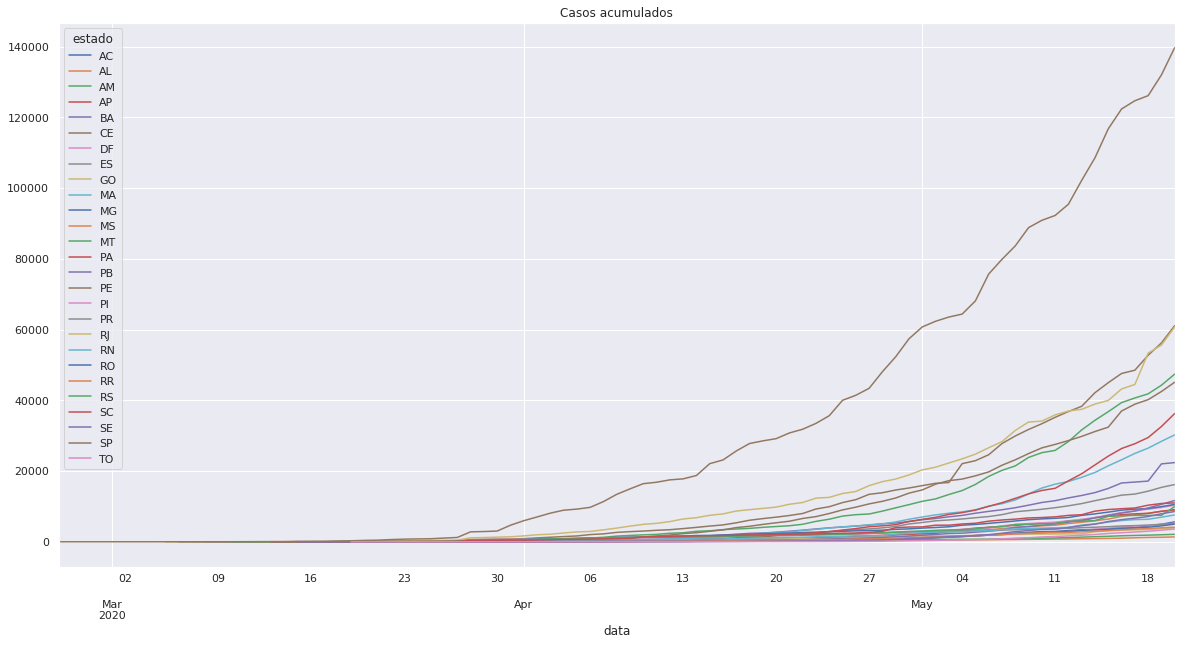

In [13]:
estados_df["casosAcumulado"].plot(title="Casos acumulados")

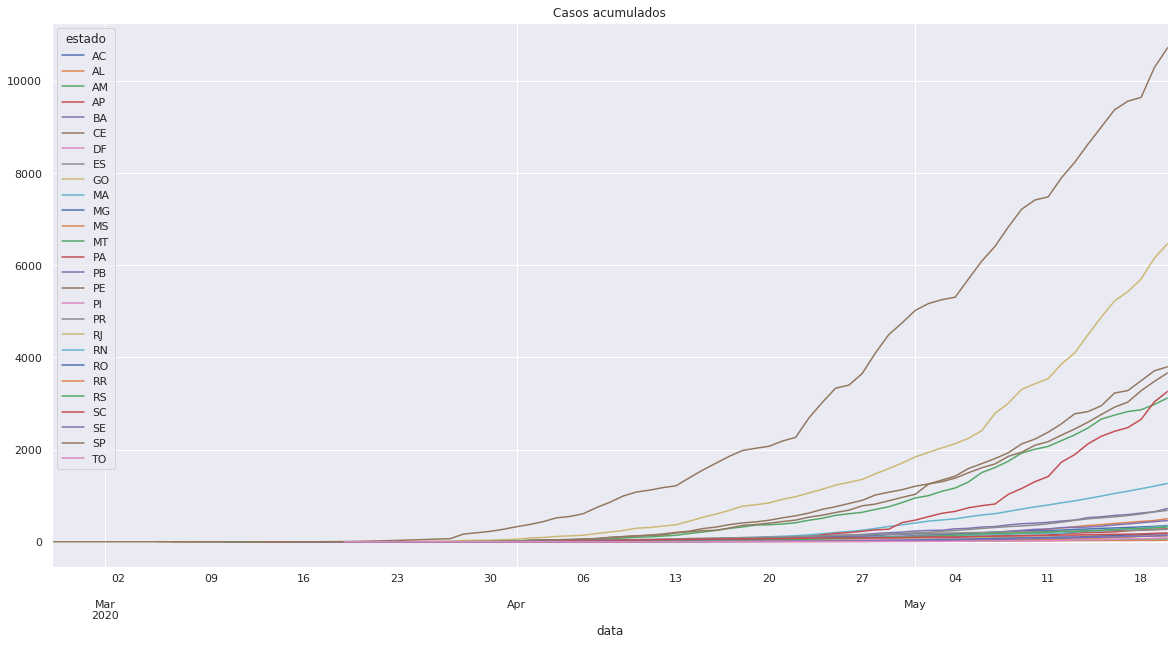

In [14]:
estados_df["obitosAcumulado"].plot(title="Casos acumulados")

# Análise de regiões

In [15]:
regioes_df = data_df[data_df["regiao"] != "Brasil"].groupby(["data", "nomeRegiaoSaude", "regiao"]).sum()

In [16]:
regioes_df.reset_index(inplace=True)
regioes_df = regioes_df.groupby(["data", "regiao"]).sum()

In [17]:
regioes_df.tail(5)

coduf       codmun  codRegiaoSaude  semanaEpi  \
data       regiao                                                        
2020-05-20 Centro-Oeste  10203  102187683.0      10204489.0       4179   
           Nordeste      33106  332205277.0      33117623.0      27972   
           Norte          5168   51831371.0       5169750.0       7518   
           Sudeste       32936  332072795.0      32997221.0      20832   
           Sul           25542  256156674.0      25549530.0      12747   

                         populacaoTCU2019  casosAcumulado  obitosAcumulado  \
data       regiao                                                            
2020-05-20 Centro-Oeste        13842355.0            8861              202   
           Nordeste            52150299.0           99199             5525   
           Norte               17837828.0           55558             3607   
           Sudeste             83150695.0          113197             9116   
           Sul                 25836235.0           13049              392   

                         Recuperadosnovos  emAcompanhamentoNovos  
data       regiao                                                 
2020-05-20 Centro-Oeste               0.0                    0.0  
           Nordeste                   0.0                    0.0  
           Norte                      0.0                    0.0  
           Sudeste                    0.0                    0.0  
           Sul                        0.0                    0.0

In [18]:
# Indexando apenas pela data
regioes_df = regioes_df.reset_index().set_index("data")

In [19]:
regioes_df

,regiao,coduf,codmun,codRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,obitosAcumulado,Recuperadosnovos,emAcompanhamentoNovos
data,,,,,,,,,,
2020-03-28,Centro-Oeste,1030,10315715.0,1030098.0,260,8700229.0,360,1,0.0,0.0
2020-03-28,Nordeste,1479,14846225.0,1479505.0,741,20158395.0,626,9,0.0,0.0
2020-03-28,Norte,267,2675520.0,267078.0,247,7723706.0,184,1,0.0,0.0
2020-03-28,Sudeste,3236,32613852.0,3239489.0,1261,48995853.0,2171,96,0.0,0.0
2020-03-28,Sul,4389,44005916.0,4390224.0,1352,15060019.0,502,5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-05-20,Centro-Oeste,10203,102187683.0,10204489.0,4179,13842355.0,8861,202,0.0,0.0
2020-05-20,Nordeste,33106,332205277.0,33117623.0,27972,52150299.0,99199,5525,0.0,0.0
2020-05-20,Norte,5168,51831371.0,5169750.0,7518,17837828.0,55558,3607,0.0,0.0


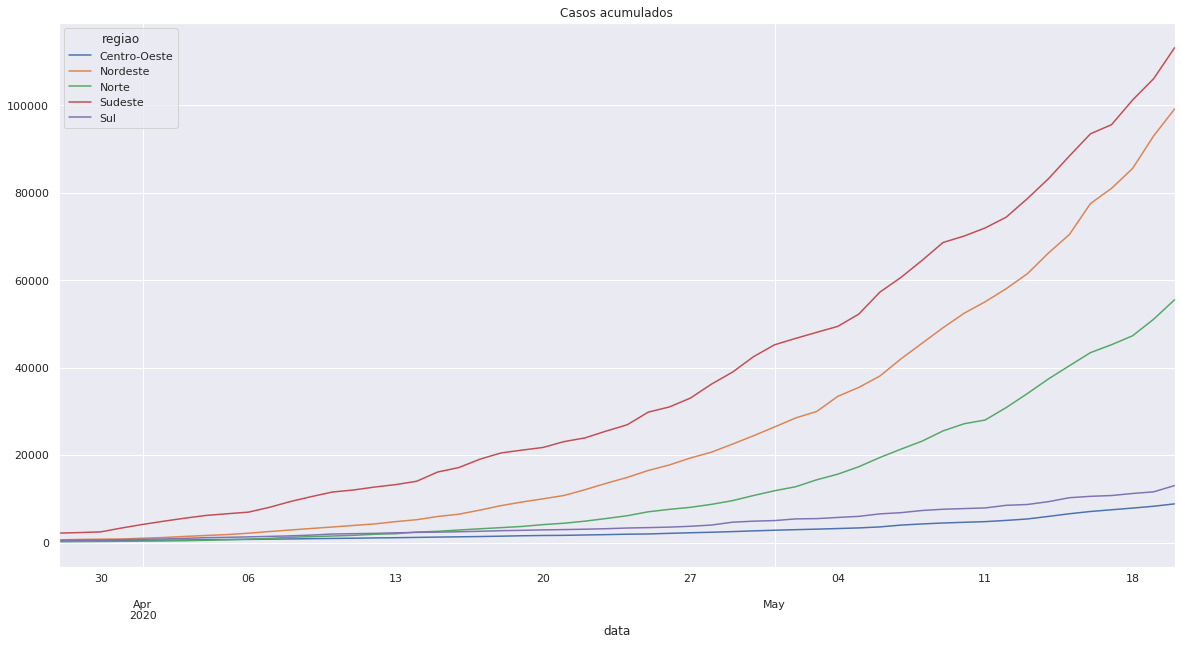

In [20]:
final_reg_df = regioes_df.pivot(columns="regiao")
final_reg_df["casosAcumulado"].plot(title="Casos acumulados")

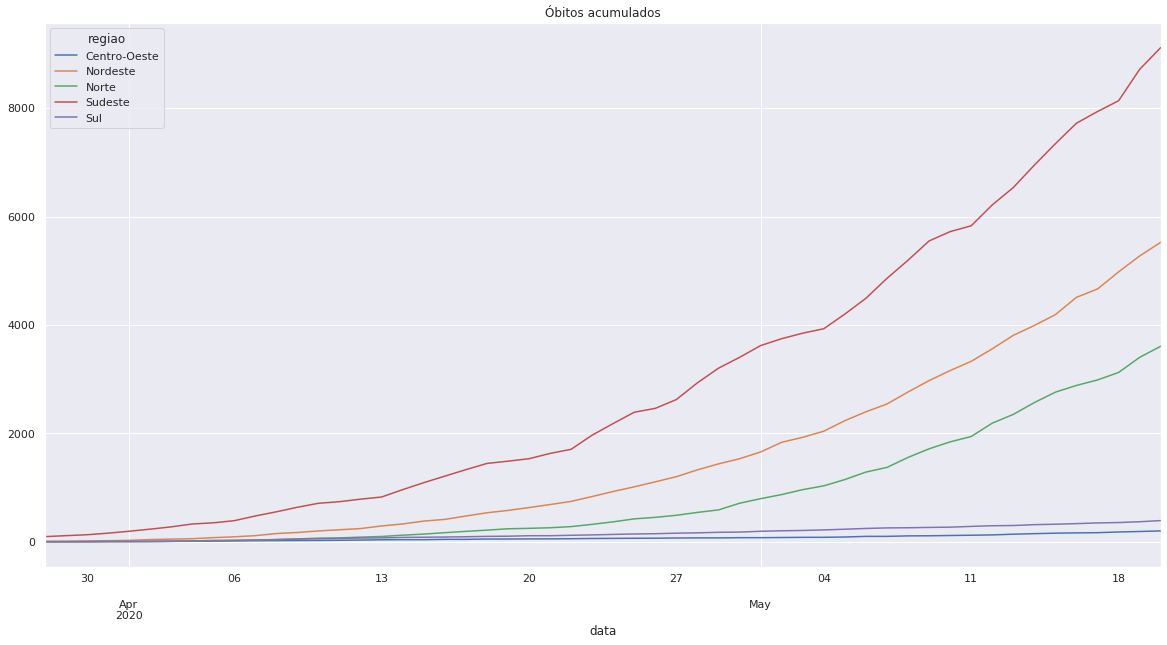

In [21]:
final_reg_df["obitosAcumulado"].plot(title="Óbitos acumulados")

In [22]:
final_reg_df.tail()

coduf                                     codmun  \
regiao     Centro-Oeste Nordeste Norte Sudeste    Sul Centro-Oeste   
data                                                                 
2020-05-16         9075    30418  4870   31104  23819   90889922.0   
2020-05-17         9277    30672  4960   31298  23946   92911067.0   
2020-05-18         9482    31274  4943   31690  24195   94964594.0   
2020-05-19         9944    32192  5078   32357  24527   99590864.0   
2020-05-20        10203    33106  5168   32936  25542  102187683.0   

                                                               ...  \
regiao         Nordeste       Norte      Sudeste          Sul  ...   
data                                                           ...   
2020-05-16  305233068.0  48837995.0  313565834.0  238881679.0  ...   
2020-05-17  307780590.0  49742481.0  315522129.0  240152869.0  ...   
2020-05-18  313827151.0  49571987.0  319476214.0  242649068.0  ...   
2020-05-19  323033513.0  50924887.0  326207658.0  245976771.0  ...   
2020-05-20  332205277.0  51831371.0  332072795.0  256156674.0  ...   

           Recuperadosnovos                             emAcompanhamentoNovos  \
regiao         Centro-Oeste Nordeste Norte Sudeste  Sul          Centro-Oeste   
data                                                                            
2020-05-16              0.0      0.0   0.0     0.0  0.0                   0.0   
2020-05-17              0.0      0.0   0.0     0.0  0.0                   0.0   
2020-05-18              0.0      0.0   0.0     0.0  0.0                   0.0   
2020-05-19              0.0      0.0   0.0     0.0  0.0                   0.0   
2020-05-20              0.0      0.0   0.0     0.0  0.0                   0.0   

                                        
regiao     Nordeste Norte Sudeste  Sul  
data                                    
2020-05-16      0.0   0.0     0.0  0.0  
2020-05-17      0.0   0.0     0.0  0.0  
2020-05-18      0.0   0.0     0.0  0.0  
2020-05-19      0.0   0.0     0.0  0.0  
2020-05-20      0.0   0.0     0.0  0.0  

[5 rows x 45 columns]

# Análise de estados

In [23]:
aux_df = data_df[data_df["regiao"] != "Brasil"]
aux_df = aux_df[["estado", "data", "municipio", "casosAcumulado", "obitosAcumulado"]]

In [24]:
aux_df = aux_df.groupby(["data", "estado"]).sum()
aux_df.reset_index(inplace=True)

In [25]:

estados_df = aux_df.set_index("data").pivot(columns="estado")

In [26]:
estados_df.head()

casosAcumulado                                      ...  \
estado                 AC  AL  AM  AP  BA  CE  DF  ES  GO  MA  ...   
data                                                           ...   
2020-02-26            NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...   
2020-02-27            NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...   
2020-02-28            NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...   
2020-02-29            NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...   
2020-03-01            NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...   

           obitosAcumulado                                       
estado                  PR  RJ  RN  RO  RR  RS  SC  SE   SP  TO  
data                                                             
2020-02-26             NaN NaN NaN NaN NaN NaN NaN NaN  0.0 NaN  
2020-02-27             NaN NaN NaN NaN NaN NaN NaN NaN  0.0 NaN  
2020-02-28             NaN NaN NaN NaN NaN NaN NaN NaN  0.0 NaN  
2020-02-29             NaN NaN NaN NaN NaN NaN NaN NaN  0.0 NaN  
2020-03-01             NaN NaN NaN NaN NaN NaN NaN NaN  0.0 NaN  

[5 rows x 54 columns]

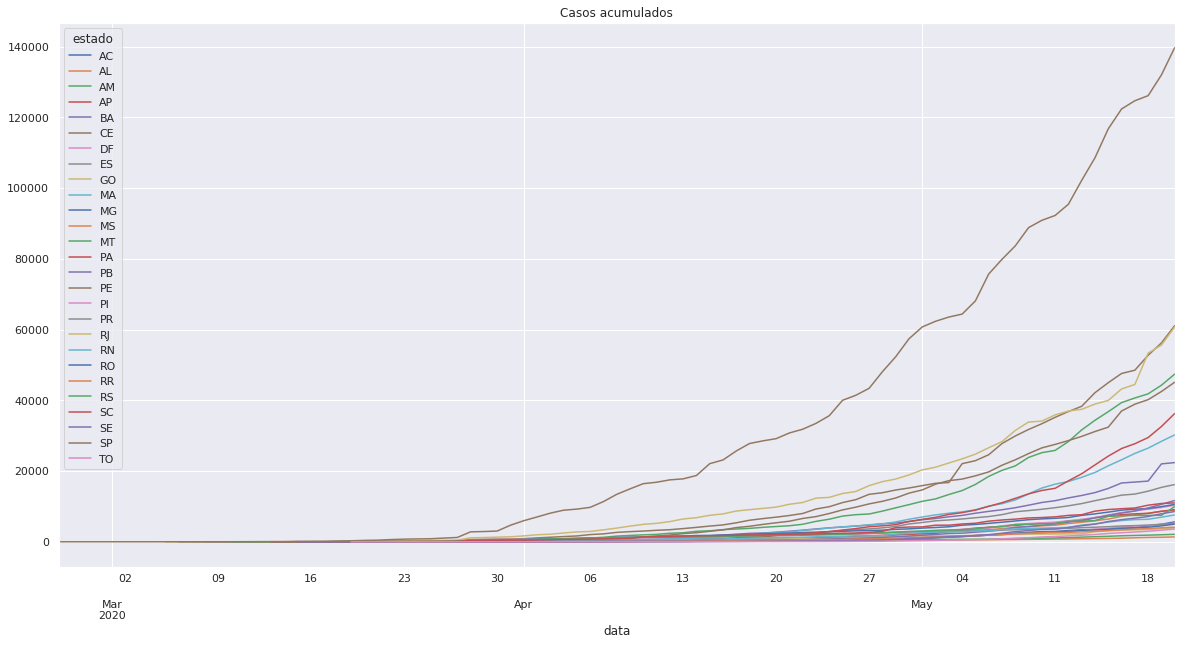

In [27]:
estados_df["casosAcumulado"].plot(title="Casos acumulados")

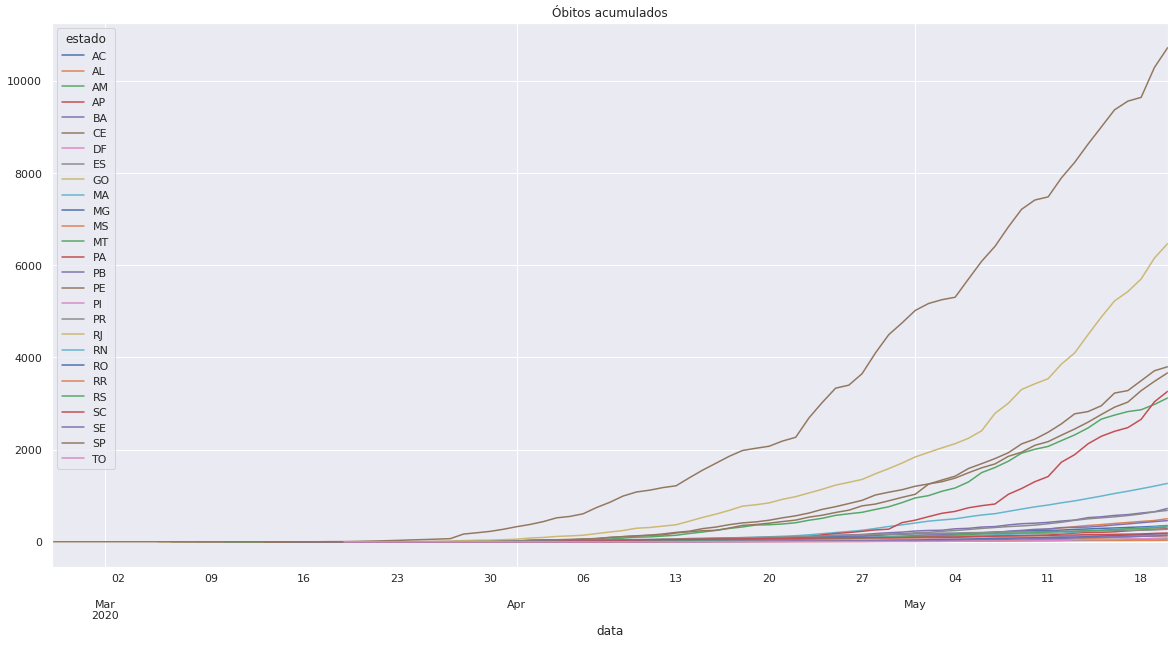

In [28]:
estados_df["obitosAcumulado"].plot(title="Óbitos acumulados")


# Visualização dos dados mais recentes

In [29]:
final_reg_df.iloc[-1]["casosAcumulado"]

regiao
Centro-Oeste      8861.0
Nordeste         99199.0
Norte            55558.0
Sudeste         113197.0
Sul              13049.0
Name: 2020-05-20 00:00:00, dtype: float64

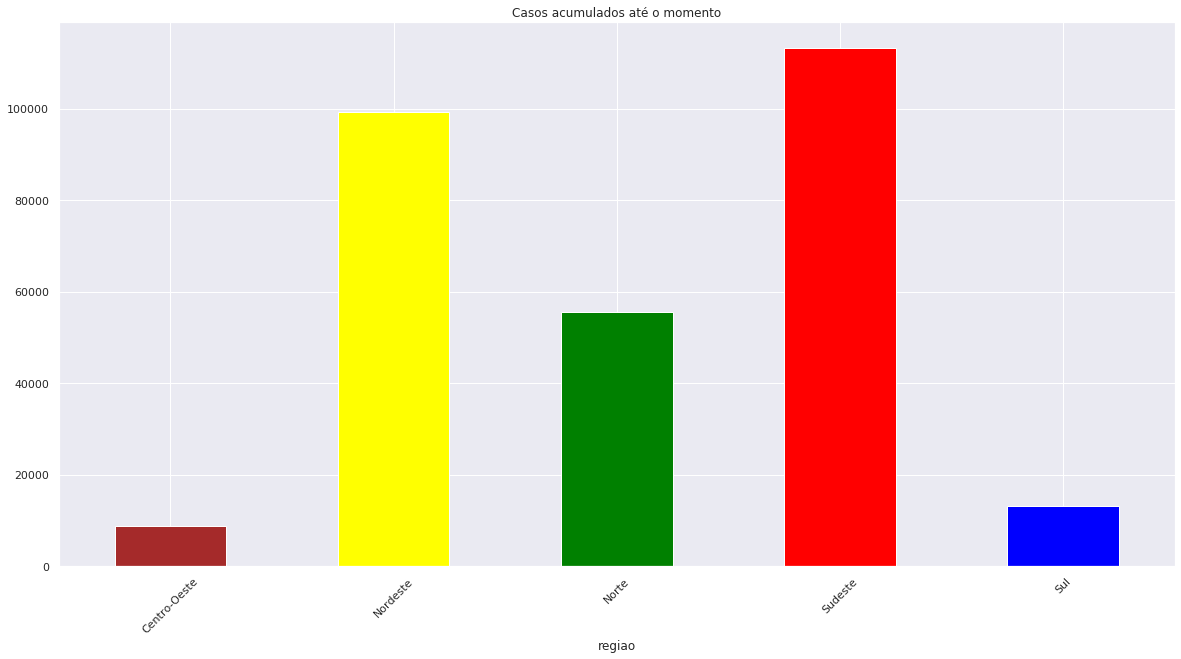

In [30]:
final_reg_df.iloc[-1]["casosAcumulado"].plot.bar(rot=45, color=["brown", "yellow", "green", "red", "blue", "pink"], title="Casos acumulados até o momento")

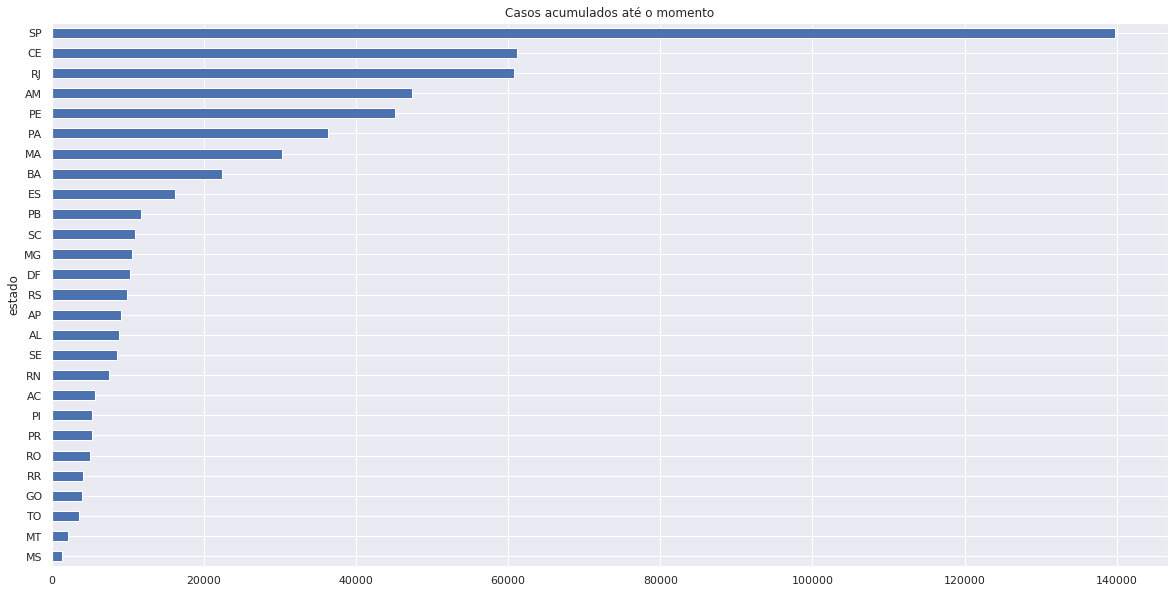

In [31]:
estados_df.iloc[-1]["casosAcumulado"].sort_values().plot.barh(title="Casos acumulados até o momento")

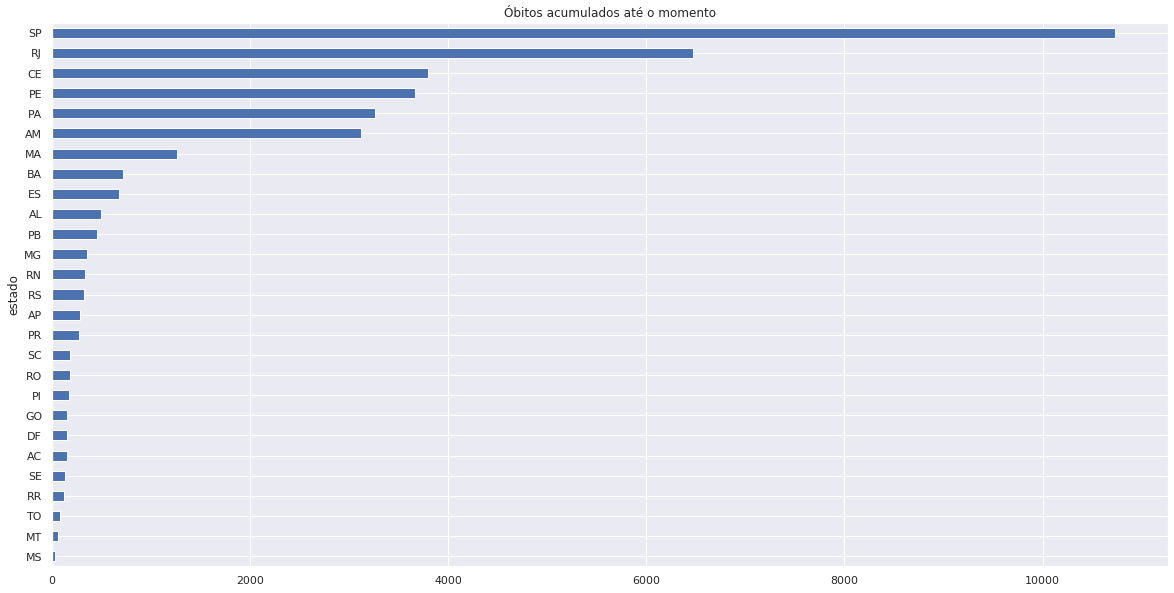

In [32]:
estados_df.iloc[-1]["obitosAcumulado"].sort_values().plot.barh(title="Óbitos acumulados até o momento")

In [33]:
# TODO exportar para tratados como planilha excel